In [2]:
#Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.
#Tính giá trị lớn nhất và nhỏ nhất của GDP.
#Hãy cho biết xu hướng phân bố dữ liệu của GDP.
#Hãy cho biết châu lục nào xuất hiện nhiều nhất?
#Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.
import pandas as pd
import numpy as np

df = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")
df

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [4]:
#Tính giá trị lớn nhất và nhỏ nhất của GDP.
print("Min GDP là: ", df["GDP (millions of US$)"].min())
print("Max GDP là: ", df["GDP (millions of US$)"].max())
df.rename(columns = {"GDP (millions of US$)":"GDP"}, inplace = True)
df

Min GDP là:  10600
Max GDP là:  15094025


,Country,Continent,GDP
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


Mean:  555427.784 Median:  96089.0


<AxesSubplot:ylabel='Density'>

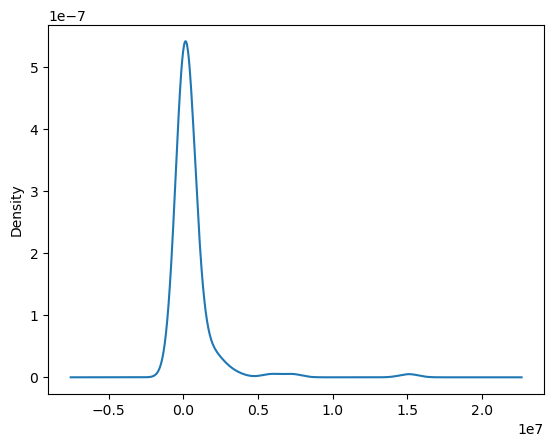

In [19]:
#Hãy cho biết xu hướng phân bố dữ liệu của GDP.
#Tìm phân bố dữ liệu của một cột định lượng thì mình làm sao ? 
#Mean, mode, median
print("Mean: ", df["GDP"].mean(), "Median: ", df["GDP"].median())
x = df["GDP"].value_counts()
x
df["GDP"].plot(kind = "kde")


<AxesSubplot:ylabel='Density'>

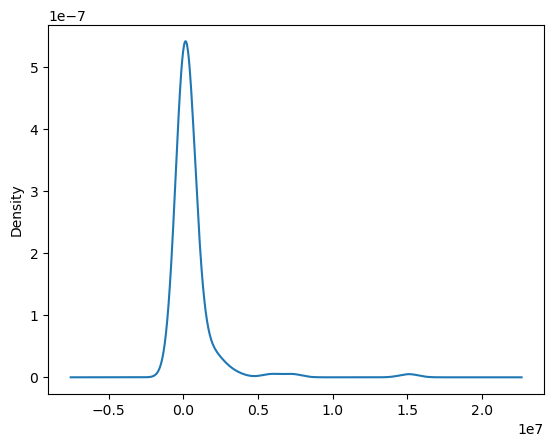

In [46]:
#Hãy cho biết châu lục nào xuất hiện nhiều nhất và số lần xuất hiện? 
#print("Châu lục xuất hiện nhiều nhất", df["Continent"].mode().iloc[0])
print("Châu lục xuất hiện nhiều nhất là",df["Continent"].value_counts().idxmax(),"với số lần xuất hiện là:", df["Continent"].value_counts().iloc[0])



Châu lục xuất hiện nhiều nhất là Europe với số lần xuất hiện là: 37


In [38]:
#Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.
table = pd.pivot_table(df,index = "Continent", values = "GDP", aggfunc = {"sum","mean"})
table
table.rename(columns ={"Continent":"Chauluc","mean":"TBC GDP", "sum":"Sum GDP"}, inplace = True)
df1.insert(0,"Chauluc",table.index)

Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

In [85]:
table = pd.pivot_table(df,index = "Continent", values = "GDP", aggfunc = {"sum","mean"})
table

,mean,sum
Continent,,
Africa,6.278659e+04,1820811
Asia,6.784970e+05,24425891
Europe,5.172805e+05,19139380
North America,1.658041e+06,18238447
Oceania,5.542423e+05,1662727
South America,4.601352e+05,4141217


In [87]:
table.rename(columns ={"Continent":"Chauluc","mean":"TBC GDP", "sum":"Sum GDP"}, inplace = True)

In [89]:
table.rename(columns = {"Continent":"Chauluc"},inplace = True)
table

,TBC GDP,Sum GDP
Continent,,
Africa,6.278659e+04,1820811
Asia,6.784970e+05,24425891
Europe,5.172805e+05,19139380
North America,1.658041e+06,18238447
Oceania,5.542423e+05,1662727
South America,4.601352e+05,4141217


In [90]:
df1 = table

In [96]:
df1.insert(0,"Chauluc",table.index)
df1

,Chauluc,TBC GDP,Sum GDP
Continent,,,
Africa,Africa,6.278659e+04,1820811
Asia,Asia,6.784970e+05,24425891
Europe,Europe,5.172805e+05,19139380
North America,North America,1.658041e+06,18238447
Oceania,Oceania,5.542423e+05,1662727
South America,South America,4.601352e+05,4141217


In [101]:
df1.reset_index(inplace = True)

In [103]:
df1
df1.drop("Continent", axis = 1, inplace = True)
df1

,Chauluc,TBC GDP,Sum GDP
0,Africa,6.278659e+04,1820811
1,Asia,6.784970e+05,24425891
2,Europe,5.172805e+05,19139380
3,North America,1.658041e+06,18238447
4,Oceania,5.542423e+05,1662727
5,South America,4.601352e+05,4141217


In [100]:
df1

,Chauluc,TBC GDP,Sum GDP
Continent,,,
Africa,Africa,6.278659e+04,1820811
Asia,Asia,6.784970e+05,24425891
Europe,Europe,5.172805e+05,19139380
North America,North America,1.658041e+06,18238447
Oceania,Oceania,5.542423e+05,1662727
South America,South America,4.601352e+05,4141217
